# Model training tests

In [34]:
## Import packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from flaml import AutoML
from rdkit.Chem import rdMolDescriptors as rd


DATAPATH = "../data"
FIGUREPATH = "../figures"

## PADEL Descriptors
The authors of the publication originally try PADEL descriptors to train the model. Because Padel descriptors take a long time to be calculated, we only do it once for the whole file and save the results

In [35]:
from padelpy import from_smiles

df = pd.read_csv(os.path.join(DATAPATH, "training_set.csv"))
unprocessed_idx = []
descs = []
for i,smi in enumerate(df["smiles"].tolist()):
    try:
        descriptors = from_smiles([smi])
        descs.extend(descriptors)
    except:
        print(f"Error processing SMILES: {smi}")
        unprocessed_idx += [i]

descs_df = pd.DataFrame(descs)

df_ = df.drop(unprocessed_idx)
df_padel = pd.concat([df_.reset_index(drop=True), descs_df.reset_index(drop=True)], axis=1)


# Save the updated DataFrame to a CSV file
df_padel.to_csv(os.path.join(DATAPATH, "training_set_padel.csv"), index=False)

Error processing SMILES: O=[N+]([O-])[O-]
Error processing SMILES: CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=O)C(=O)N[C@H]2C(=O)N[C@H]3C(=O)N[C@H](C(=O)N[C@H](C(=O)O)c4cc(O)cc(O)c4-c4cc3ccc4O)[C@H](O)c3ccc(c(Cl)c3)Oc3cc2cc(c3O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O[C@H]2C[C@](C)(N)[C@H](O)[C@H](C)O2)Oc2ccc(cc2Cl)[C@H]1O
Error processing SMILES: C/C1=C2/N=C(/C=C3\N=C(/C(C)=C4\[N-][C@@](C)([C@@H]5N=C1[C@](C)(CCC(=O)NC[C@@H](C)OP(=O)([O-])O[C@H]1[C@@H](O)[C@@H](n6cnc7cc(C)c(C)cc76)O[C@@H]1CO)[C@H]5CC(N)=O)[C@@](C)(CC(N)=O)[C@@H]4CCC(N)=O)[C@@](C)(CC(N)=O)[C@@H]3CCC(N)=O)C(C)(C)[C@@H]2CCC(N)=O
Error processing SMILES: NN
Error processing SMILES: NN=O
Error processing SMILES: O=S(=O)([O-])[O-]


In [36]:
len(df_padel)

583

In [37]:
df = pd.read_csv(os.path.join(DATAPATH, "training_set_padel.csv"))
df = df[["smiles", "inchikey", "outcome"]]
df.to_csv(os.path.join(DATAPATH, "training_set_clean.csv"), index=False)

In [38]:
# TRAIN TEST SPLITS

# we will always use the same train test split, saving the files to reuse them
# ONLY RUN ONCE
from sklearn.model_selection import train_test_split

def random_split(df, size):
    indices = np.arange(len(df))
    X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(df["smiles"], df["outcome"], indices, test_size=size, stratify=df["outcome"])
    train = df.iloc[i_train]
    test = df.iloc[i_test]
    return train, test

df = pd.read_csv(os.path.join(DATAPATH, "training_set_clean.csv"))
for i in range(5):
    train, test = random_split(df, 0.2)
    train.to_csv(os.path.join(DATAPATH, "train_test_splits", "train_{}.csv".format(i)))
    test.to_csv(os.path.join(DATAPATH, "train_test_splits", "test_{}.csv".format(i)))

[flaml.automl.logger: 01-29 00:15:15] {1679} INFO - task = classification
[flaml.automl.logger: 01-29 00:15:15] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 01-29 00:15:15] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 01-29 00:15:15] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 01-29 00:15:15] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 01-29 00:15:15] {2344} INFO - Estimated sufficient time budget=6198s. Estimated necessary time budget=143s.
[flaml.automl.logger: 01-29 00:15:15] {2391} INFO -  at 4.0s,	estimator lgbm's best error=0.3899,	best estimator lgbm's best error=0.3899
[flaml.automl.logger: 01-29 00:15:15] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 01-29 00:15:16] {2391} INFO -  at 4.9s,	estimator lgbm's best error=0.3685,	best estimator lgbm's best error=0.3685
[flaml.automl.logger: 01-29 00:15:

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


[flaml.automl.logger: 01-29 00:21:53] {2391} INFO -  at 401.5s,	estimator lrl1's best error=0.4837,	best estimator extra_tree's best error=0.2820
[flaml.automl.logger: 01-29 00:21:53] {2218} INFO - iteration 322, current learner lrl1


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


[flaml.automl.logger: 01-29 00:21:56] {2391} INFO -  at 404.4s,	estimator lrl1's best error=0.4837,	best estimator extra_tree's best error=0.2820
[flaml.automl.logger: 01-29 00:21:56] {2218} INFO - iteration 323, current learner lrl1


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


[flaml.automl.logger: 01-29 00:21:59] {2391} INFO -  at 407.5s,	estimator lrl1's best error=0.4835,	best estimator extra_tree's best error=0.2820
[flaml.automl.logger: 01-29 00:21:59] {2218} INFO - iteration 324, current learner rf


The max_iter was reached which means the coef_ did not converge


[flaml.automl.logger: 01-29 00:21:59] {2391} INFO -  at 408.2s,	estimator rf's best error=0.3021,	best estimator extra_tree's best error=0.2820
[flaml.automl.logger: 01-29 00:21:59] {2218} INFO - iteration 325, current learner extra_tree
[flaml.automl.logger: 01-29 00:22:01] {2391} INFO -  at 410.1s,	estimator extra_tree's best error=0.2820,	best estimator extra_tree's best error=0.2820
[flaml.automl.logger: 01-29 00:22:01] {2218} INFO - iteration 326, current learner rf
[flaml.automl.logger: 01-29 00:22:02] {2391} INFO -  at 410.6s,	estimator rf's best error=0.3021,	best estimator extra_tree's best error=0.2820
[flaml.automl.logger: 01-29 00:22:02] {2218} INFO - iteration 327, current learner extra_tree
[flaml.automl.logger: 01-29 00:22:03] {2391} INFO -  at 412.0s,	estimator extra_tree's best error=0.2820,	best estimator extra_tree's best error=0.2820
[flaml.automl.logger: 01-29 00:22:03] {2218} INFO - iteration 328, current learner rf
[flaml.automl.logger: 01-29 00:22:04] {2391} INF

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


[flaml.automl.logger: 01-29 00:35:12] {2391} INFO -  at 600.2s,	estimator lrl1's best error=0.5167,	best estimator xgboost's best error=0.2666


The max_iter was reached which means the coef_ did not converge


[flaml.automl.logger: 01-29 00:35:12] {2627} INFO - retrain xgboost for 0.3s
[flaml.automl.logger: 01-29 00:35:12] {2630} INFO - retrained model: XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=1.0, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=0.15001130065152102,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=7,
              min_child_weight=2.357229238701505, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=7,
              n_jobs=-1, num_parallel_tree=None, random_state=None, ...)
[flaml.automl.logger: 01-29 00:35:12] {1930} INFO - fit succeeded
[flaml.aut

The max_iter was reached which means the coef_ did not converge


[flaml.automl.logger: 01-29 00:45:16] {1679} INFO - task = classification
[flaml.automl.logger: 01-29 00:45:16] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 01-29 00:45:16] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 01-29 00:45:16] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 01-29 00:45:16] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 01-29 00:45:17] {2344} INFO - Estimated sufficient time budget=7565s. Estimated necessary time budget=174s.
[flaml.automl.logger: 01-29 00:45:17] {2391} INFO -  at 4.0s,	estimator lgbm's best error=0.3265,	best estimator lgbm's best error=0.3265
[flaml.automl.logger: 01-29 00:45:17] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 01-29 00:45:18] {2391} INFO -  at 5.0s,	estimator lgbm's best error=0.3265,	best estimator lgbm's best error=0.3265
[flaml.automl.logger: 01-29 00:45:

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


[flaml.automl.logger: 01-29 00:55:13] {2391} INFO -  at 600.3s,	estimator lrl1's best error=0.5302,	best estimator lgbm's best error=0.2761


The max_iter was reached which means the coef_ did not converge


[flaml.automl.logger: 01-29 00:55:13] {2627} INFO - retrain lgbm for 0.6s
[flaml.automl.logger: 01-29 00:55:13] {2630} INFO - retrained model: LGBMClassifier(colsample_bytree=0.9161010978502734,
               learning_rate=0.0930647844122737, max_bin=127,
               min_child_samples=27, n_estimators=1, n_jobs=-1, num_leaves=10,
               reg_alpha=0.0018633999877243066, reg_lambda=0.007623851285442064,
               verbose=-1)
[flaml.automl.logger: 01-29 00:55:13] {1930} INFO - fit succeeded
[flaml.automl.logger: 01-29 00:55:13] {1931} INFO - Time taken to find the best model: 425.194899559021
[flaml.automl.logger: 01-29 00:55:17] {1679} INFO - task = classification
[flaml.automl.logger: 01-29 00:55:17] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 01-29 00:55:17] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 01-29 00:55:17] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1'

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


[flaml.automl.logger: 01-29 01:00:08] {2391} INFO -  at 294.9s,	estimator lrl1's best error=0.4861,	best estimator lgbm's best error=0.2912
[flaml.automl.logger: 01-29 01:00:08] {2218} INFO - iteration 226, current learner lrl1


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


[flaml.automl.logger: 01-29 01:00:11] {2391} INFO -  at 297.8s,	estimator lrl1's best error=0.4861,	best estimator lgbm's best error=0.2912
[flaml.automl.logger: 01-29 01:00:11] {2218} INFO - iteration 227, current learner lrl1


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


[flaml.automl.logger: 01-29 01:00:14] {2391} INFO -  at 300.9s,	estimator lrl1's best error=0.4861,	best estimator lgbm's best error=0.2912
[flaml.automl.logger: 01-29 01:00:14] {2218} INFO - iteration 228, current learner lrl1


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


[flaml.automl.logger: 01-29 01:00:17] {2391} INFO -  at 303.8s,	estimator lrl1's best error=0.4860,	best estimator lgbm's best error=0.2912
[flaml.automl.logger: 01-29 01:00:17] {2218} INFO - iteration 229, current learner extra_tree


The max_iter was reached which means the coef_ did not converge


[flaml.automl.logger: 01-29 01:00:18] {2391} INFO -  at 304.2s,	estimator extra_tree's best error=0.3236,	best estimator lgbm's best error=0.2912
[flaml.automl.logger: 01-29 01:00:18] {2218} INFO - iteration 230, current learner lgbm
[flaml.automl.logger: 01-29 01:00:19] {2391} INFO -  at 305.8s,	estimator lgbm's best error=0.2912,	best estimator lgbm's best error=0.2912
[flaml.automl.logger: 01-29 01:00:19] {2218} INFO - iteration 231, current learner extra_tree
[flaml.automl.logger: 01-29 01:00:20] {2391} INFO -  at 306.3s,	estimator extra_tree's best error=0.3236,	best estimator lgbm's best error=0.2912
[flaml.automl.logger: 01-29 01:00:20] {2218} INFO - iteration 232, current learner rf
[flaml.automl.logger: 01-29 01:00:20] {2391} INFO -  at 306.8s,	estimator rf's best error=0.3330,	best estimator lgbm's best error=0.2912
[flaml.automl.logger: 01-29 01:00:20] {2218} INFO - iteration 233, current learner extra_tree
[flaml.automl.logger: 01-29 01:00:21] {2391} INFO -  at 307.3s,	esti

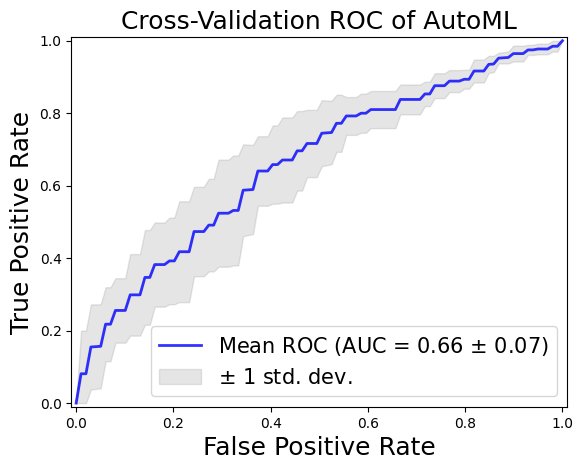

In [66]:
# Model training with PADEL Descriptors
import logging
logging.getLogger('flaml.automl').setLevel(logging.WARNING) # Suppress FLAML INFO logging

from sklearn.metrics import roc_curve, auc, classification_report

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
all_true_labels = []
all_predictions = []

df = pd.read_csv(os.path.join(DATAPATH, "training_set_padel.csv"))
#impute any missing values
for column in df.columns[3:]:
    column_mean = df[column].mean()
    df[column].fillna(column_mean, inplace=True)

#change infinity values
df.replace([np.inf, -np.inf], 1e6, inplace=True)

for i in range(5):
    train_file = f"train_{i}.csv"
    test_file = f"test_{i}.csv"
    train = pd.read_csv(os.path.join(DATAPATH, "train_test_splits", train_file))
    test = pd.read_csv(os.path.join(DATAPATH, "train_test_splits",test_file))
    train_descs = pd.merge(train, df, on=['inchikey', "smiles", "outcome"], how='left')
    test_descs = pd.merge(test, df, on =['inchikey', "smiles", "outcome"], how = "left")
    y_train = train["outcome"]
    y_test = test["outcome"]
    X_train = train_descs.iloc[:, 4:]
    X_test = test_descs.iloc[:, 4:]

    mdl = AutoML(task="classification", time_budget=600, logistic_max_iter=40000)
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict_proba(X_test)[:,1]
    y_pred_bin = [1 if y > 0.5 else 0 for y in y_pred]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # Accumulate true labels and predictions
    all_true_labels.extend(y_test)
    all_predictions.extend(y_pred_bin)

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of AutoML', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.savefig(os.path.join(FIGUREPATH, "padel_automl.png"))

## Ersilia Embeddings

In [67]:
%%capture
import lazyqsar as lq

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
all_true_labels = []
all_predictions = []

for i in range(5):
    train_file = f"train_{i}.csv"
    test_file = f"test_{i}.csv"
    train_set = pd.read_csv(os.path.join(DATAPATH, "train_test_splits", train_file))
    test_set = pd.read_csv(os.path.join(DATAPATH, "train_test_splits",test_file))
    X_train = train_set["smiles"]
    y_train = train_set["outcome"]
    X_test = test_set["smiles"]
    y_test = test_set["outcome"]


    # Fit the model on the training set for the current fold
    model = lq.ErsiliaBinaryClassifier(time_budget_sec=600, estimator_list=["rf", "lgbm", "xgboost"])
    model.fit(X_train, y_train)

    # Obtain predictions and true labels for the current fold
    y_hat_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_hat_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # Accumulate true labels and predictions
    all_true_labels.extend(y_test)
    all_predictions.extend(y_pred)

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of AutoML Morgan', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.savefig(os.path.join(FIGUREPATH, "Ersilia_AutoML_600s.png"), dpi=300)

[flaml.automl.logger: 01-29 01:18:51] {1679} INFO - task = classification
[flaml.automl.logger: 01-29 01:18:51] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 01-29 01:18:51] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 01-29 01:18:51] {1900} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost']
[flaml.automl.logger: 01-29 01:18:51] {2218} INFO - iteration 0, current learner rf
[flaml.automl.logger: 01-29 01:18:51] {2344} INFO - Estimated sufficient time budget=941s. Estimated necessary time budget=1s.
[flaml.automl.logger: 01-29 01:18:51] {2391} INFO -  at 0.1s,	estimator rf's best error=0.3496,	best estimator rf's best error=0.3496
[flaml.automl.logger: 01-29 01:18:51] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 01-29 01:18:51] {2391} INFO -  at 0.3s,	estimator lgbm's best error=0.3814,	best estimator rf's best error=0.3496
[flaml.automl.logger: 01-29 01:18:51] {2218} INFO - iteration 2, current learner xgbo

## Morgan Fingerprints

In [ ]:
%%capture

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
all_true_labels = []
all_predictions = []

for i in range(5):
    train_file = f"train_{i}.csv"
    test_file = f"test_{i}.csv"
    train_set = pd.read_csv(os.path.join(DATAPATH, "train_test_splits", train_file))
    test_set = pd.read_csv(os.path.join(DATAPATH, "train_test_splits",test_file))
    X_train = train_set["smiles"]
    y_train = train_set["outcome"]
    X_test = test_set["smiles"]
    y_test = test_set["outcome"]


    # Fit the model on the training set for the current fold
    model = lq.MorganBinaryClassifier(time_budget_sec=600, estimator_list=["rf", "lgbm", "xgboost"])
    model.fit(X_train, y_train)

    # Obtain predictions and true labels for the current fold
    y_hat_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_hat_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # Accumulate true labels and predictions
    all_true_labels.extend(y_test)
    all_predictions.extend(y_pred)

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of AutoML Morgan', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.savefig(os.path.join(FIGUREPATH, "Morgan_AutoML_600s.png"), dpi=300)

In [ ]:
## AutoML with dili padel

smilescsv = pd.read_csv(os.path.join(DATAPATH,'dilismiles.csv'), names = ['col_smiles'])
smileslist = smilescsv['col_smiles'].tolist()

In [ ]:
data = pd.read_csv('../data/dili_padel_2d.csv')
dataframe = pd.DataFrame(data)
desc = pd.DataFrame(dataframe.iloc[:, 3:])

In [ ]:
y = dataframe['Outcome']
y = np.array(y)

In [ ]:
import logging

# Suppress FLAML INFO logging
logging.getLogger('flaml.automl').setLevel(logging.WARNING)

from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'desc' and 'y' are your input data
# Initialize AutoML for classification task
modelAutoML = AutoML(task="classification", time_budget=600, logistic_max_iter=40000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
all_true_labels = []
all_predictions = []

for i, (train, test) in enumerate(cv.split(desc, y)):
    modelAutoML.fit(desc.iloc[train], y[train], time_budget=120)
    y_hat_proba = modelAutoML.predict_proba(desc.iloc[test])[:, 1]

    fpr, tpr, thresholds = roc_curve(y[test], y_hat_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # Classification report
    y_pred = modelAutoML.predict(desc.iloc[test])
    print(f"\nClassification Report for Fold {i}:\n")
    print(classification_report(y[test], y_pred))

    # Accumulate true labels and predictions
    all_true_labels.extend(y[test])
    all_predictions.extend(y_pred)

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of AutoML', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

#Using Ersilia

In [ ]:
# Load your CSV file
df = pd.read_csv('../data/dilismiles_with_outcome.csv')

In [ ]:
## using ersilia to change smiles to embeddings
import pandas as pd
from eosce.models import ErsiliaCompoundEmbeddings

# Assuming 'SMILES' is the column containing chemical compounds
compounds = df['smiles'].tolist()

# Initialize the ErsiliaCompoundEmbeddings model
model = ErsiliaCompoundEmbeddings()

# Create a new column for embeddings
df['embeddings'] = df['smiles'].apply(lambda x: model.transform([x])[0])

# Display the DataFrame with the new embeddings
print(df.head())

In [ ]:
y= df['outcome']

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
import numpy as np

# Assuming 'ID' column contains embedding vectors
X = np.array(df['embeddings'].values.tolist())
X.shape

In [ ]:
y.shape

In [ ]:
import warnings
import xgboost
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, classification_report
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Initialize AutoML for classification task
modelAutoML = AutoML(task="classification", time_budget=600, logistic_max_iter=80000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 10))
i = 0

all_true_labels = []
all_predictions = []

for train, test in cv.split(X, y):
    modelAutoML.fit(X[train], y[train], verbose=1)
    probas_ = modelAutoML.predict_proba(X[test])[:, 1]

    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Classification report
    y_pred = modelAutoML.predict(X[test])
    print(f"\nClassification Report for Fold {i}:\n")
    print(classification_report(y[test], y_pred))

    # Accumulate true labels and predictions
    all_true_labels.extend(y[test])
    all_predictions.extend(y_pred)

    i += 1

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of AutoML', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()


In [ ]:
## confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming modelAutoML is your trained AutoML model
predictions = modelAutoML.predict(X[test])

# Get the confusion matrix
cm = confusion_matrix(y[test], predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted", fontsize=16)
plt.ylabel("True", fontsize=16)
plt.title("Confusion Matrix", fontsize=18)

plt.show()

In [ ]:
##save the model with AutoML_ersilia
import joblib
joblib.dump(modelAutoML, '../../checkpoints/AutoML_ersilia.joblib')

# With Morgan Fingerprints

In [ ]:
##import dependecies
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

In [ ]:
import pandas as pd
smilescsv = pd.read_csv('../data/dilismiles_with_outcome.csv', names=['smiles'])

In [ ]:
# Add RDKit molecules column and filter out invalid molecules
smilescsv['mol'] = smilescsv['smiles'].apply(lambda x: Chem.MolFromSmiles(x) if x is not None else None)
smilescsv = smilescsv.dropna(subset=['mol'])

# Generate Morgan Fingerprints
smilescsv['morgan_fps'] = smilescsv['mol'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=1024))

In [ ]:
max_length = max(len(fp.GetOnBits()) for fp in smilescsv['morgan_fps'])
X = np.array([list(fp.GetOnBits()) + [0] * (max_length - len(fp.GetOnBits())) for fp in smilescsv['morgan_fps']])

In [ ]:
print(X)

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, classification_report
import numpy as np
import matplotlib.pyplot as plt
import ray

ray.init(ignore_reinit_error=True)


warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Assuming you have X as a list of lists
# No padding for non-sequential data
X = np.array(X)  # Convert X to numpy array if it's not already
y = np.array(y)  # Convert y to numpy array if it's not already

# Initialize AutoML for classification task
modelAutoML = AutoML(task="classification", time_budget=600, logistic_max_iter=40000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 10))
i = 0

# Initialize lists for accumulating true labels and predictions
all_true_labels = []
all_predictions = []

for train, test in cv.split(X, y):
    modelAutoML.fit(X[train], y[train], verbose=-1)
    probas_ = modelAutoML.predict_proba(X[test])[:, 1]

    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Classification report
    y_pred = modelAutoML.predict(X[test])
    print(f"\nClassification Report for Fold {i}:\n")
    print(classification_report(y[test], y_pred))

    # Accumulate true labels and predictions
    all_true_labels.extend(y[test])
    all_predictions.extend(y_pred)

    i += 1

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of AutoML', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()
plt.savefig("../figures/morgan_automl_roc_plot.png")

In [ ]:
## confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming modelAutoML is your trained AutoML model
predictions = modelAutoML.predict(X[test])

# Get the confusion matrix
cm = confusion_matrix(y[test], predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted", fontsize=16)
plt.ylabel("True", fontsize=16)
plt.title("Confusion Matrix", fontsize=18)

plt.show()
plt.savefig("../figures/morgan_automl_confusion_matrix_plot.png")

In [ ]:
##save the model with AutoML_ersilia
import joblib
joblib.dump(modelAutoML, '../../checkpoints/AutoML_morgan_fp.joblib')

# AutoGluon Model
Basic Autogluon Example

In [ ]:
import pandas as pd
from rdkit import Chem
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
##Autogluon with padel
smilescsv = pd.read_csv('../data/dilismiles.csv', names = ['col_smiles'])
data = pd.read_csv('../data/dili_padel_2d.csv')
dataframe = pd.DataFrame(data)
desc = pd.DataFrame(dataframe.iloc[:, 3:])

# Install Autogluon

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
X = TabularDataset('../data/dili_padel_2d.csv')
print(X.head(), X.shape)

In [ ]:
y = X['Outcome']
print(type(y),y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [ ]:
X.shape

In [ ]:
label = 'Outcome'

In [ ]:
fit_args = {}
fit_args['time_limit'] = 1200
predictor = TabularPredictor(label=label).fit(x_train,presets="best_quality", **fit_args)
performance = predictor.evaluate(x_test)

In [ ]:
print(performance)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'outcome' is the target column in your dataset
y_true = x_test['Outcome']
y_scores = predictor.predict_proba(x_test.drop(columns=[label])).iloc[:, 1]  # Probability of positive class

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_true, y_scores)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_true, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred_binary = (y_scores > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Autogluon with Morgan fingerprints

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [ ]:
data = pd.read_csv('../data/dilismiles_with_outcome.csv')
dataframe = pd.DataFrame(data)
desc = pd.DataFrame(dataframe)

In [ ]:
import pandas as pd
from rdkit.Chem import AllChem, MolFromSmiles

# Assuming 'col_smiles' is the column containing SMILES strings
data['mol'] = data['smiles'].apply(lambda x: MolFromSmiles(x))
# Generate Morgan fingerprints
data['morgan_fp'] = data['mol'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=1024))
# Convert Morgan fingerprints to a binary vector representation
data['morgan_vec'] = [list(fp.ToBitString()) for fp in data['morgan_fp']]

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'morgan_vec' is the column containing binary vector representations
X = data['morgan_vec'].tolist()
y = data['outcome']


In [ ]:
# Flatten the lists in 'morgan_vec' column
X_flattened = pd.DataFrame(X).apply(lambda x: x.explode()).reset_index(drop=True)

# Combine flattened features with target variable
df = pd.concat([X_flattened, pd.Series(y, name='outcome')], axis=1)

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

fit_args = {}
fit_args['time_limit'] = 1200
label = 'outcome'  # Replace with the actual target column name

# Create and train the AutoGluon TabularPredictor
predictor = TabularPredictor(label=label)
predictor.fit(train_data=train_df, presets="best_quality", num_bag_folds=5, **fit_args)

In [ ]:
# Use the trained predictor to make predictions on the test set
y_pred = predictor.predict(test_df.drop(columns=[label]))

# Evaluate the performance of the model
performance = predictor.evaluate_predictions(y_true=test_df[label], y_pred=y_pred)
print(performance)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'outcome' is the target column in your dataset
y_true = test_df['outcome']
y_scores = predictor.predict_proba(test_df.drop(columns=[label])).iloc[:, 1]  # Probability of positive class

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_true, y_scores)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_true, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred_binary = (y_scores > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Autogluon with Ersilia embeddings

In [ ]:
import pandas as pd
from eosce.models import ErsiliaCompoundEmbeddings
from sklearn.model_selection import train_test_split

import pandas as pd

# Load only 'smiles' and 'Outcome' columns from the CSV file
df = pd.read_csv('../data/dilismiles_with_outcome.csv', usecols=['smiles', 'outcome'])

# Display the first few rows of the DataFrame
print(df.head())

# Assuming 'SMILES' is the column containing chemical compounds
compounds = df['smiles'].tolist()
# Initialize the ErsiliaCompoundEmbeddings model
model = ErsiliaCompoundEmbeddings()

In [ ]:
# Create a new column for embeddings
df['embeddings'] = df['smiles'].apply(lambda x: model.transform([x])[0])

In [ ]:
print(df)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['embeddings'].tolist(), df['outcome'].tolist(), test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor

# Convert X_train to a list
X_train_list = [embedding.flatten().tolist() for embedding in X_train]

# Convert X_test to a list
X_test_list = [embedding.flatten().tolist() for embedding in X_test]

# Convert lists to tuples
X_train_tuples = [tuple(embedding) for embedding in X_train_list]
X_test_tuples = [tuple(embedding) for embedding in X_test_list]

# Combine embeddings with labels for training data
df_train = pd.DataFrame({'embeddings': X_train_tuples, 'outcome': y_train})

label = 'outcome'
fit_args = {}
fit_args['time_limit'] = 1200

predictor = TabularPredictor(label=label)
predictor.fit(df_train, presets="best_quality", **fit_args)

# Convert X_test to a DataFrame
df_test = pd.DataFrame({'embeddings': X_test_tuples})

# Now you can predict using the trained model on the test data
predictions = predictor.predict(df_test)



In [ ]:
#Print performance
df_test_with_labels = pd.DataFrame({'outcome': y_test, 'embeddings': X_test_tuples})
predictions = predictor.predict(df_test_with_labels)

# Evaluate the predictions
performance = predictor.evaluate(df_test_with_labels, silent=True)
print(performance)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'y_test' is your ground truth labels
df_test_with_labels = pd.DataFrame({'outcome': y_test, 'embeddings': X_test_tuples})

# Now you can predict using the trained model on the test data
predictions = predictor.predict_proba(df_test_with_labels)

# Get the predicted probabilities for the positive class
y_scores = predictions.iloc[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(df_test_with_labels['outcome'], y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
plt.savefig("../figures/ersilia_AutoGluon_auroc_plot.png")

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Assuming 'y_test' is your ground truth labels
df_test_with_labels = pd.DataFrame({'outcome': y_test, 'embeddings': X_test_tuples})

# Now you can predict using the trained model on the test data
predictions = predictor.predict(df_test_with_labels)

# Get the confusion matrix
conf_matrix = confusion_matrix(df_test_with_labels['outcome'], predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig("../figures/ersilia_AutoGluon_confusion_matrix.png")

In [ ]:
## Autogluon with padelpy descriptors

In [ ]:
import pandas as pd
from padelpy import from_smiles

# Read the CSV file with SMILES and outcome columns
data = pd.read_csv('../data/dilismiles_with_outcome.csv')


data_subset = data.head(337)

# Convert SMILES column to a list
smiles_list = data_subset['smiles'].tolist()

# Calculate descriptors for each SMILES string
descriptors_list = from_smiles(smiles_list)

# Convert descriptors list to a DataFrame
descriptors_df = pd.DataFrame(descriptors_list)

# Add the outcome column to the descriptors DataFrame
descriptors_df['outcome'] = data_subset['outcome']

# Save the descriptors of the first 10 rows to a new CSV file
output_csv_file = '../data/padel_descriptors.csv'
descriptors_df.to_csv(output_csv_file, index=False)

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
X = TabularDataset('../data/padel_descriptors.csv')
print(X.head(), X.shape)

In [ ]:
y = X['outcome']
print(type(y),y.shape)

In [ ]:
from sklearn.model_selecvtion import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [ ]:
X.shape

In [ ]:
label='outcome'

In [ ]:
fit_args = {}
fit_args['time_limit'] = 1200

# Use the TabularPredictor with specified label and eval_metric
predictor = TabularPredictor(label=label).fit(x_train,presets="best_quality" **fit_args) 
performance = predictor.evaluate(x_test)

In [ ]:
print(performance)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'outcome' is the target column in your dataset
y_true = x_test['outcome']
y_scores = predictor.predict_proba(x_test.drop(columns=[label])).iloc[:, 1]  

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_true, y_scores)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_true, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
